In [9]:
import silence_tensorflow.auto
import tensorflow as tf
from ensmallen_graph.datasets.kghub import KGCOVID19

In [2]:
graph = KGCOVID19().remove(
    singletons=True,
    selfloops=True
)
graph.enable(
    vector_outbounds=True,
    vector_destinations=True
)

In [3]:
graph

The undirected multigraph KGCOVID19 has 435631 nodes with 43 different node types:  the 5 most common are biolink:Publication (nodes number 189234), biolink:OntologyClass (nodes number 48912), biolink:Drug (nodes number 36066), biolink:ChemicalSubstance (nodes number 23301) and biolink:Disease (nodes number 22288) and 17943499 unweighted edges with 34 different edge types:  the 5 most common are biolink:related_to, biolink:interacts_with, biolink:subclass_of, biolink:part_of and biolink:enables, of which none are self-loops and 2734 are parallel. The graph is quite sparse as it has a density of 0.00019 and has 720 connected components, where the component with most nodes has 431964 nodes and the component with the least nodes has 2 nodes. The graph median node degree is 10, the mean node degree is 82.38, and the node degree mode is 1. The top 5 most central nodes are MESH:D014780 (degree 122238), MESH:D006801 (degree 104307), MESH:D018352 (degree 92928), WD:Q30 (degree 92141) and NCBITaxon:2697049 (degree 91006).The hash of the graph is cc8268347bb701fb .

In [10]:
import pandas as pd
from typing import Dict
from embiggen import GraphSkipGram
from ensmallen_graph import EnsmallenGraph
from cache_decorator import Cache

@Cache(cache_path="embeddings/skipgram/{_hash}.csv.xz")
def compute_skipgram_embedding(graph: EnsmallenGraph, **kwargs: Dict) -> pd.DataFrame:
    """Return embedding computed using SkipGram on given graph.

    Parameters
    ----------------------
    graph: EnsmallenGraph,
        Graph to embed.
    **kwargs: Dict,
        Additional kwargs.

    Returns
    ---------------------
    Pandas dataframe with the computed embedding.
    """
    # Creating the SkipGram model
    model = GraphSkipGram(
        graph, 
        support_mirror_strategy=True,
        embedding_size=20,
        **kwargs
    )
    # Fitting the SkipGram model
    model.fit()
    # Returning the obtained embedding
    return model.get_embedding_dataframe()

In [11]:
with tf.distribute.MirroredStrategy(devices=["/GPU:1", "/GPU:2", "/GPU:3", "/GPU:4"]).scope():
    node_embedding = compute_skipgram_embedding(graph)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4')
Epoch 1/100
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:1 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:1 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:1 then broadcast to ('/job

In [12]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ENSEMBL:ENSG00000004059,0.043970,-0.049731,-0.019796,0.025804,-0.005145,0.023777,0.034147,-0.014480,0.014765,0.034873,0.038419,-0.047708,-0.032887,-0.036459,-0.038685,0.049453,-0.039637,-0.036790,0.018423,0.015578
ENSEMBL:ENSG00000143933,0.020425,0.016809,0.026225,-0.014378,0.003893,0.022488,-0.001696,-0.000242,-0.042183,0.025757,0.045393,0.035322,0.048967,-0.022943,0.000013,0.046955,-0.049216,0.037564,0.007970,-0.022371
ENSEMBL:ENSG00000131089,0.015731,-0.039234,-0.043260,-0.035054,0.041166,0.024151,0.023519,0.013582,0.026417,0.037930,0.008548,0.049652,-0.024942,0.048900,-0.037941,0.019306,-0.000734,-0.022820,0.011212,0.014002
ENSEMBL:ENSG00000178607,-0.009483,0.013307,0.014022,0.046113,0.029318,-0.044625,-0.004166,0.019038,0.000285,-0.048784,0.024534,-0.047977,0.049219,-0.046853,0.042608,-0.005704,-0.041569,-0.001848,0.043051,-0.049849
ENSEMBL:ENSG00000147889,1.032246,1.629555,1.661041,1.242743,1.626058,-1.304285,-1.578976,1.641178,1.665310,1.333004,1.293761,1.143772,-1.323660,-1.651116,-1.643891,-1.288592,1.599545,-1.526590,-1.343435,-1.437943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGI:MGI:95524,0.900274,1.029450,0.969202,0.904062,1.020198,-0.914490,-1.029843,1.006843,1.008769,0.987280,0.969829,0.904112,-0.988591,-1.051557,-1.043418,-0.934957,1.035570,-0.992687,-0.954468,-0.980331
REACT:R-HSA-389388,1.276487,2.269738,2.287861,1.011394,2.205153,-1.394029,-2.227322,2.281347,2.255470,1.447682,1.357514,1.023736,-1.270285,-2.196796,-2.254680,-1.208798,2.155360,-2.149846,-1.245087,-1.537440
REACT:R-HSA-109797,0.691827,3.067430,2.798929,0.818096,3.006144,-0.925262,-3.122834,3.053399,3.309568,1.050167,1.041606,0.782870,-1.126100,-3.212593,-2.817939,-0.856888,2.880932,-2.903979,-0.989436,-1.355874
REACT:R-HSA-5082395,0.844220,1.985641,2.041611,0.719098,2.004933,-0.977293,-1.999928,1.988092,2.003613,1.069217,0.930431,0.711819,-0.937116,-1.988927,-1.939147,-0.844041,1.979714,-1.911418,-0.990035,-1.184249


In [13]:
from embiggen.visualizations import GraphVisualizations

In [15]:
visualizer = GraphVisualizations()
visualizer.fit_transform_nodes(graph, node_embedding, verbose=True)

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Nodes types - KGCOVID19'}>)

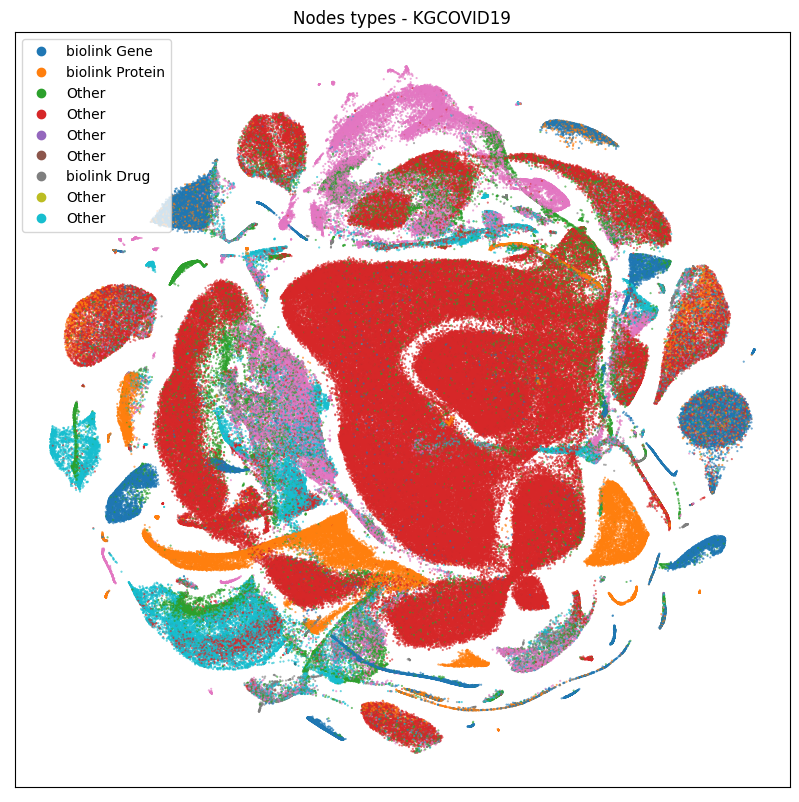

In [16]:
visualizer.plot_node_types(graph)

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot:title={'center':'Nodes degrees - KGCOVID19'}>)

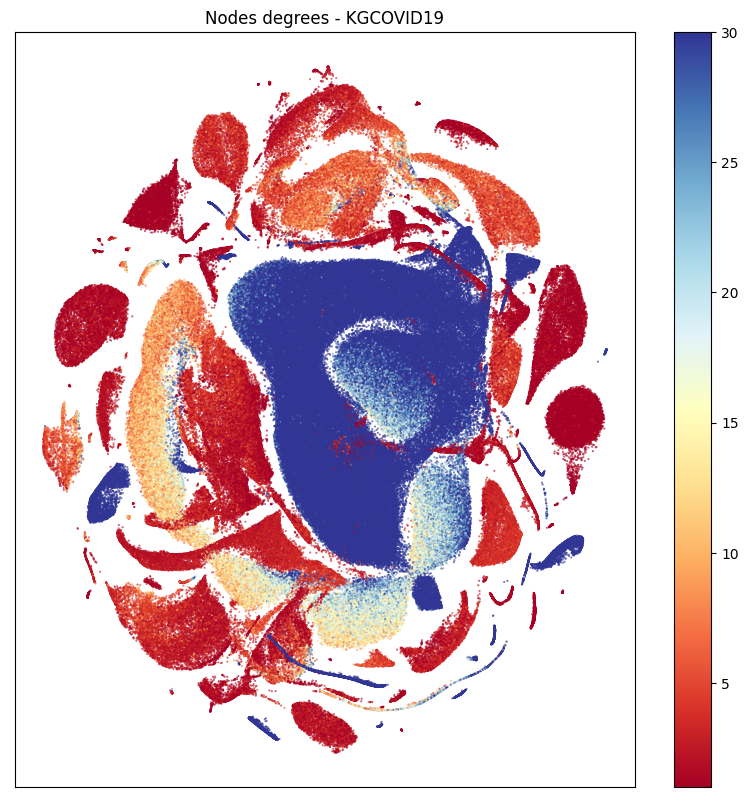

In [17]:
visualizer.plot_node_degrees(graph)